In [28]:
import pandas as pd
df = pd.read_csv('dataset_olympics.csv')

In [29]:
# Display the attribute (column) names
print("Attribute names:\n", df.columns)

Attribute names:
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [30]:
#make a new column for bmi
df['Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df[['Height', 'Weight','Sex','BMI']].head(10))

   Height  Weight  Sex        BMI
0    1.80    80.0    M  24.691358
1    1.70    60.0    M  20.761246
2     NaN     NaN    M        NaN
3     NaN     NaN    M        NaN
4    1.85    82.0    F  23.959094
5     NaN     NaN  NaN        NaN
6    1.85    82.0    F  23.959094
7     NaN     NaN  NaN        NaN
8    1.85    82.0    F  23.959094
9     NaN     NaN  NaN        NaN


In [31]:
# Descriptive statistics for numeric values
print(df[['Age','Weight','Height', 'BMI']].describe())

                Age        Weight        Height           BMI
count  45869.000000  37712.000000  38024.000000  37390.000000
mean      24.646907     70.703635      1.753054     22.780489
std        5.363997     14.501656      0.107887      2.926327
min       11.000000     25.000000      1.270000     12.267562
25%       21.000000     60.000000      1.680000     20.957274
50%       24.000000     70.000000      1.750000     22.499637
75%       27.000000     80.000000      1.830000     24.158818
max       71.000000    170.000000      2.230000     50.762937


In [32]:
# Calculate variance for multiple columns 
var_values = df[['Age','Weight', 'Height', 'BMI']].var()
print('The variance for age, height, weight and BMI is: \n')
print(var_values)

The variance for age, height, weight and BMI is: 

Age        28.772463
Weight    210.298037
Height      0.011640
BMI         8.563389
dtype: float64


In [33]:
# Calculate missing values for all columns
missing_values = df.isna().sum()

# Print missing values for each column
print('Missing values in each column:')
print(missing_values)

# Print the total number of missing values
print('\nTotal number of missing values:', missing_values.sum())


Missing values in each column:
ID            0
Name      22488
Sex       22488
Age       24131
Height    31976
Weight    32288
Team      22488
NOC       22488
Games     22488
Year      22488
Season    22488
City      22488
Sport     22488
Event     22488
Medal     63840
BMI       32610
dtype: int64

Total number of missing values: 409725


In [34]:
# Print the first 10 rows before handeling missing values
print('\nFirst 10 rows before handeling the missing values\n')
print(df.head(10))


First 10 rows before handeling the missing values

                                                  ID  \
0                                                  1   
1                                                  2   
2                                                  3   
3                                                  4   
4                                                  5   
5  5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,N...   
6                                                  5   
7  5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,N...   
8                                                  5   
9  5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,N...   

                       Name  Sex   Age  Height  Weight            Team  NOC  \
0                 A Dijiang    M  24.0    1.80    80.0           China  CHN   
1                  A Lamusi    M  23.0    1.70    60.0           China  CHN   
2       Gunnar Nielsen Aaby    M  24.0     NaN     NaN         Denmark  DEN   
3      Edgar Li

In [35]:
# Display the DataFrame before filling
print('\nDataFrame before replacing missing values:')
print(df)


DataFrame before replacing missing values:
                                                      ID  \
0                                                      1   
1                                                      2   
2                                                      3   
3                                                      4   
4                                                      5   
...                                                  ...   
69995                                              35656   
69996                                              35656   
69997  35657,"David Thomas ""Dave"" Fitzsimons",M,26....   
69998  35657,"David Thomas ""Dave"" Fitzsimons",M,30....   
69999                                              35658   

                           Name  Sex   Age  Height  Weight            Team  \
0                     A Dijiang    M  24.0    1.80    80.0           China   
1                      A Lamusi    M  23.0    1.70    60.0           China   
2

In [36]:
#Handeling missing values
df['ID'] = df['ID'].fillna(-1) #DONE

# Fill missing values for numeric columns with their means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with their modes
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [37]:
# Display the DataFrame after filling
print('\nDataFrame after replacing missing values:')
print(df)


DataFrame after replacing missing values:
                                                      ID  \
0                                                      1   
1                                                      2   
2                                                      3   
3                                                      4   
4                                                      5   
...                                                  ...   
69995                                              35656   
69996                                              35656   
69997  35657,"David Thomas ""Dave"" Fitzsimons",M,26....   
69998  35657,"David Thomas ""Dave"" Fitzsimons",M,30....   
69999                                              35658   

                                   Name Sex        Age    Height     Weight  \
0                             A Dijiang   M  24.000000  1.800000  80.000000   
1                              A Lamusi   M  23.000000  1.700000  60.000000   

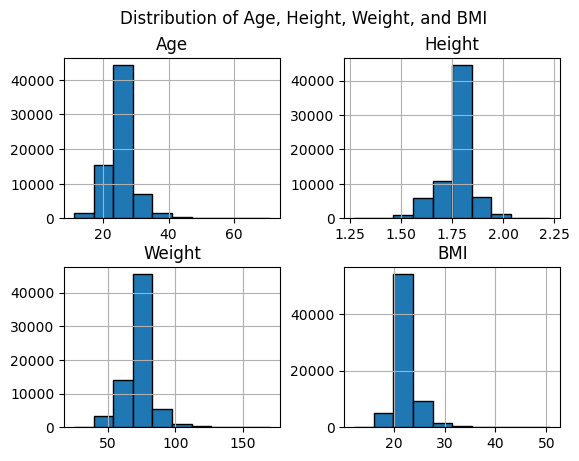

In [38]:
import matplotlib.pyplot as plt

# Specify the columns you want to plot
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

# Create histograms
df[columns_to_plot].hist(bins=10, edgecolor='black')

# Display the plots
plt.suptitle('Distribution of Age, Height, Weight, and BMI')
plt.show()

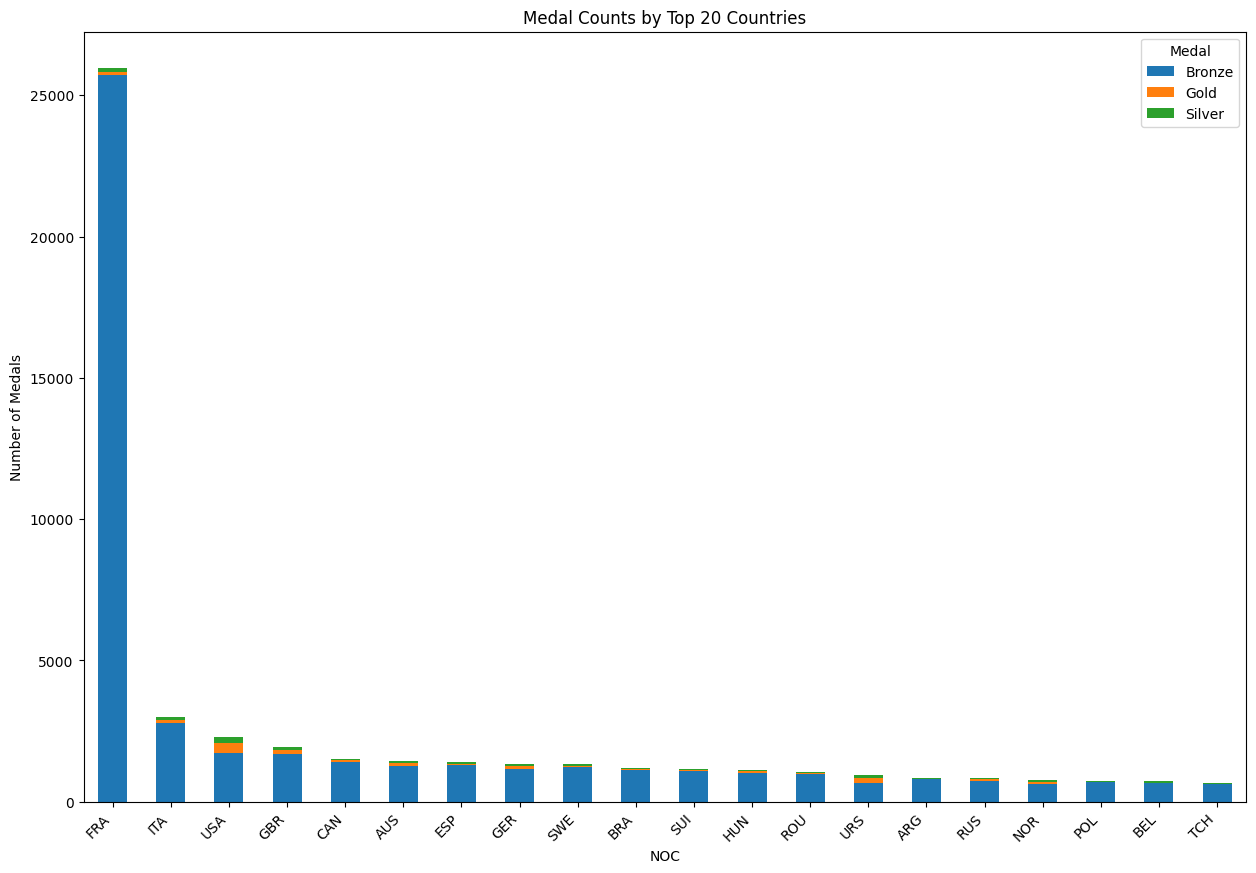

In [39]:
#Top 20 countries by total medals 

# Group by NOC and count medals
medal_counts = df.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)

# Sum the total medals for each country
total_medals = medal_counts.sum(axis=1)

# Get the top 20 countries by total medals
top_20_countries = total_medals.nlargest(20).index

# Filter the medal_counts DataFrame to include only the top 20 countries
top_20_medal_counts = medal_counts.loc[top_20_countries]

# Plot the bar chart
top_20_medal_counts.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Medal Counts by Top 20 Countries')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

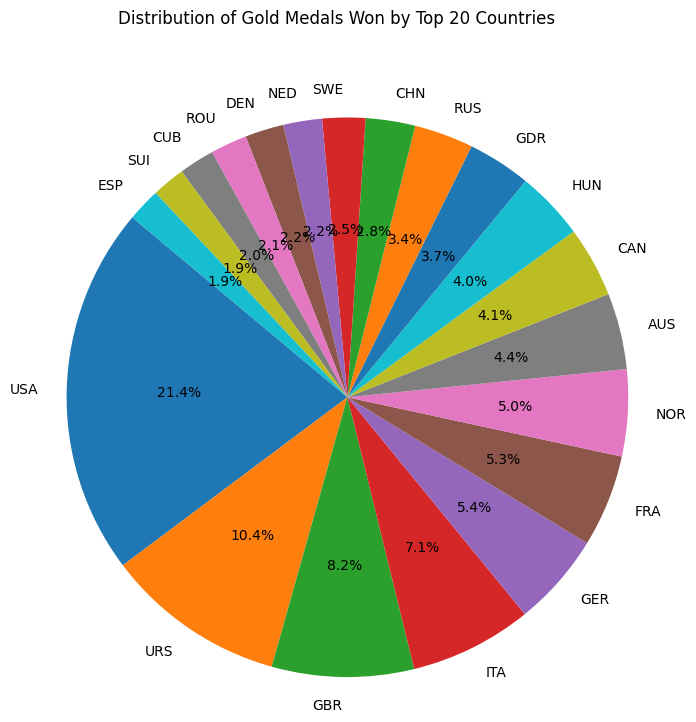

In [40]:
#Top 20 countries winning gold medals
gold_medals = df[df['Medal'] == 'Gold']
gold_medal_counts = gold_medals['NOC'].value_counts().nlargest(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(gold_medal_counts, labels=gold_medal_counts.index, autopct='%1.1f%%', startangle=140)
plt.suptitle('Distribution of Gold Medals Won by Top 20 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

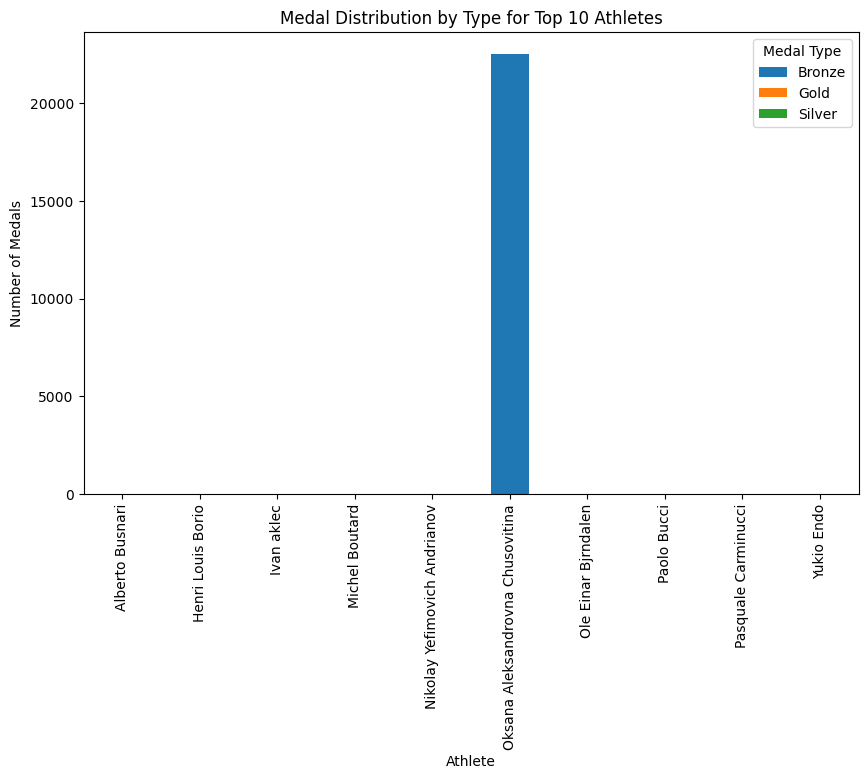

In [41]:
#Top 10 atheletes 
import matplotlib.pyplot as plt

# Filter the dataset for the top 10 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a pivot table to count the medals by type for each athlete
medals_by_type = top_athletes_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)

# Plot the stacked bar chart with a smaller figure size
medals_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Type for Top 10 Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()

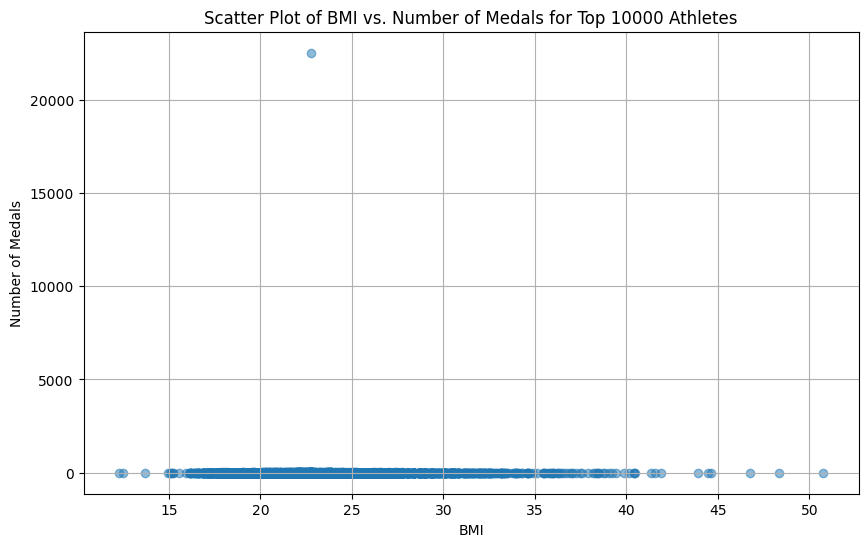

In [42]:
#Top 1000 atheletes ans their BMI 

# Filter the dataset for the top 10000 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10000).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a DataFrame to store the number of medals and BMI for each top athlete
athlete_bmi_medals = top_athletes_df.groupby('Name').agg({
    'BMI': 'mean',  # Average BMI for each athlete
    'Medal': 'count'  # Total number of medals for each athlete
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(athlete_bmi_medals['BMI'], athlete_bmi_medals['Medal'], alpha=0.5)

plt.title('Scatter Plot of BMI vs. Number of Medals for Top 10000 Athletes')
plt.xlabel('BMI')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

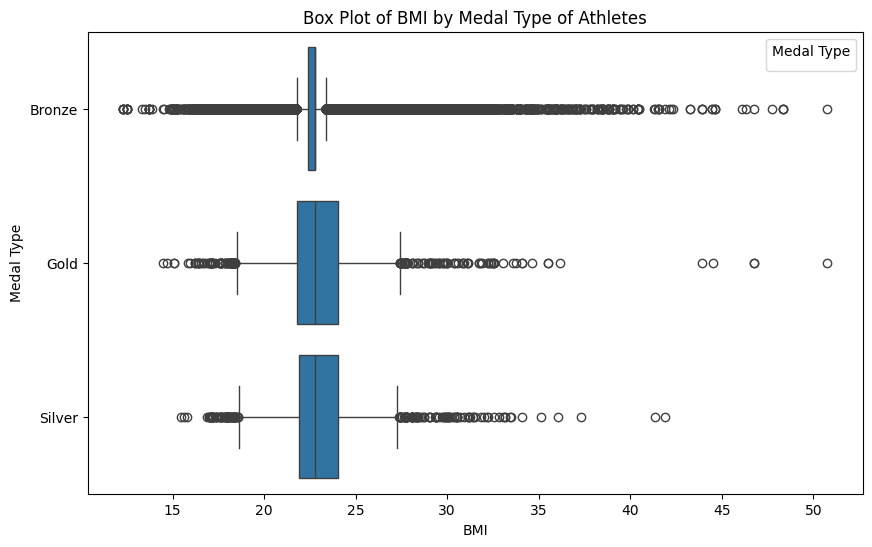

In [43]:
# Install seaborn using the %pip magic command
%pip install seaborn

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Medal', data=df)
plt.title('Box Plot of BMI by Medal Type of Athletes')
plt.xlabel('BMI')
plt.ylabel('Medal Type')

# Manually create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Medal Type')

plt.show()

# Data Preprocessing

## Check and delete duplicate rows.

Duplicate data can result in inaccurate information and a lack of data integrity. It can lead to incorrect calculations and decisions based on wrong data.

In [44]:
import pandas as pd
# remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

In [45]:
import pandas as pd
# find duplicate rows
duplicate_rows = df.duplicated()
# print duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print("Duplicated rows:", [duplicate_rows])

Number of duplicate rows: 0
Duplicated rows: [0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 69611, dtype: bool]


## Remove noise
Noisy data are data that contains errors, outliers, missing values, or inconsistencies that can affect
the qualityand reliability of your analysis.
We want to remove the noisy data, first by removing unnecessary columns, removing rows that has missing columns,  as well as outliers detection and removal.



**Delete unnecessary columns**

We will remove the rows "Weight","Height" and "Team", considering the newly added BMI column to be derived from "Weight" and "Height", thus, they
are not needed anymore, and it is better to remove them alongside the "Team" column because our study is focused on predicting medal outcomes, and using the column "NOC" will be enough.

In [46]:
import pandas as pd
df.drop(columns=["Height", "Weight","Team"], inplace=True)

**Delete unnecessary rows**

We will remove the rows that has the value of "Year" set to 1999 or less, because it will be considered outdated data.

In [47]:
# Remove rows where 'Year' is 1999 or less
df = df[df['Year'] > 1999]

# Display the cleaned DataFrame
print(df)

          ID                           Name Sex   Age  NOC        Games  \
1          2                       A Lamusi   M  23.0  CHN  2012 Summer   
28         9               Antti Sami Aalto   M  26.0  FIN  2002 Winter   
31        12              Jyri Tapani Aalto   M  31.0  FIN  2000 Summer   
33        13             Minna Maarit Aalto   F  34.0  FIN  2000 Summer   
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
...      ...                            ...  ..   ...  ...          ...   
69982  35650               Rory Fitzpatrick   M  24.0  IRL  2004 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69984  35652                Tom Fitzpatrick   M  29.0  IRL  2004 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   
69990  35653          Casey J. FitzRandolph   M  31.0  USA  2006 Winter   

         Year  Season            City          Sport  \
1      2012.0  Summer          London      

**remove rows that has missing columns**

We will avoid removing rows that has the "Medal" missing, because it indicates that the player has not won any medal, and it is an essential information when it comes to our study, but we will remove other columns, using the subset parameter.

In [48]:
import pandas as pd
# Drop rows with missing values, ignoring the 'Medal' column
df_cleaned = df.dropna(subset=["Name", "Sex", "Age","NOC","Games","Year","Season","City","Sport","Event","BMI"])
print("Dataframe after removing rows with missing data (ignoring the Medal column):")
print(df_cleaned)

Dataframe after removing rows with missing data (ignoring the Medal column):
          ID                           Name Sex   Age  NOC        Games  \
1          2                       A Lamusi   M  23.0  CHN  2012 Summer   
28         9               Antti Sami Aalto   M  26.0  FIN  2002 Winter   
31        12              Jyri Tapani Aalto   M  31.0  FIN  2000 Summer   
33        13             Minna Maarit Aalto   F  34.0  FIN  2000 Summer   
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
...      ...                            ...  ..   ...  ...          ...   
69982  35650               Rory Fitzpatrick   M  24.0  IRL  2004 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69984  35652                Tom Fitzpatrick   M  29.0  IRL  2004 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   
69990  35653          Casey J. FitzRandolph   M  31.0  USA  2006 Winter   

         Year  Season 

**Detect outliers and remove them**

we will use the Z score to detect the outliers in our numerical data ("BMI" and "Age"), after that, we will remove the outliers from the dataframe.

the Z score is a statistical measure that indicates how many standard deviations a data point is away from the mean.

In [49]:
import pandas as pd
from scipy import stats

# Z-score calculation for Age and BMI
z_scores_age = stats.zscore(df["Age"])
z_scores_bmi = stats.zscore(df["BMI"])

# Set a threshold for Z-score (3 standard deviations)
threshold = 3

# Identify outliers based on Z-score
outliers_age = df[abs(z_scores_age) > threshold]
outliers_bmi = df[abs(z_scores_bmi) > threshold]

print("Outliers in Age:")
print(outliers_age)

print("Outliers in BMI:")
print(outliers_bmi)

Outliers in Age:
          ID                                    Name Sex   Age  NOC  \
830      471                   Ashraf Abou El-Hassan   M  41.0  EGY   
2247    1244                   Felipe Aguilar Schler   M  41.0  CHI   
3223    1809  Nasser Salih Nasser Abdullah Al-Attiya   M  41.0  QAT   
3224    1809  Nasser Salih Nasser Abdullah Al-Attiya   M  45.0  QAT   
3304    1858                       Fehaid Al-Deehani   M  45.0  KUW   
...      ...                                     ...  ..   ...  ...   
65649  33593                Custdio Ribeiro Ezequiel   M  42.0  POR   
66195  33861                             Ennio Falco   M  44.0  ITA   
66728  34132                            Eduardo Farr   M  57.0  ARG   
68029  34751    Emanuel de Jesus R. da Cos Fernandes   M  41.0  ANG   
68874  35128                            Martin Fiala   M  42.0  GER   

             Games    Year  Season            City             Sport  \
830    2016 Summer  2016.0  Summer  Rio de Janeiro        

In [50]:
import pandas as pd
# Filter the DataFrame, keeping only rows with Z-scores below the threshold
df_no_outliers = df[(abs(z_scores_age) < threshold) & (abs(z_scores_bmi) < threshold)]

print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
          ID                           Name Sex   Age  NOC        Games  \
1          2                       A Lamusi   M  23.0  CHN  2012 Summer   
28         9               Antti Sami Aalto   M  26.0  FIN  2002 Winter   
31        12              Jyri Tapani Aalto   M  31.0  FIN  2000 Summer   
33        13             Minna Maarit Aalto   F  34.0  FIN  2000 Summer   
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
...      ...                            ...  ..   ...  ...          ...   
69982  35650               Rory Fitzpatrick   M  24.0  IRL  2004 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69984  35652                Tom Fitzpatrick   M  29.0  IRL  2004 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   
69990  35653          Casey J. FitzRandolph   M  31.0  USA  2006 Winter   

         Year  Season            City          Sport  \
1      2012.0  

## Categorical data encoding

Since most of our dataframe is made of categorical data, it is best to encode these data to be easier for the machine to read, most machine learning algorithms require numerical input, so categorical variables must be converted to a numerical format.

We will Encode the columns with nominal categorical variables using [One-Hot Encoding] : **Sex, NOC, Games, Season, City, Sport, Event.**

We will use ordinal encoding for the **Medal** column, since the order has a meaning:

-Gold (highest)

-Silver

-Bronze

-No Medal (lowest)

**Medal encoding:**

In [51]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordering for medals
medal_order = ['No Medal', 'Bronze', 'Silver', 'Gold']

# Initialize OrdinalEncoder with the defined order
encoder = OrdinalEncoder(categories=[medal_order])

# Fit and transform the Medal column
df['Medal'] = encoder.fit_transform(df[['Medal']])

print("DataFrame after Ordinal Encoding for Medal:")
print(df)

DataFrame after Ordinal Encoding for Medal:
          ID                           Name Sex   Age  NOC        Games  \
1          2                       A Lamusi   M  23.0  CHN  2012 Summer   
28         9               Antti Sami Aalto   M  26.0  FIN  2002 Winter   
31        12              Jyri Tapani Aalto   M  31.0  FIN  2000 Summer   
33        13             Minna Maarit Aalto   F  34.0  FIN  2000 Summer   
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
...      ...                            ...  ..   ...  ...          ...   
69982  35650               Rory Fitzpatrick   M  24.0  IRL  2004 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69984  35652                Tom Fitzpatrick   M  29.0  IRL  2004 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   
69990  35653          Casey J. FitzRandolph   M  31.0  USA  2006 Winter   

         Year  Season            City          Sport  \

 **Sex, NOC, Games, Season, City, Sport, Event Encoding:**

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specified columns
for column in ['Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']:
    df[column] = label_encoder.fit_transform(df[column])

print("DataFrame after Label Encoding:")
print(df)

DataFrame after Label Encoding:
          ID                           Name  Sex   Age  NOC  Games    Year  \
1          2                       A Lamusi    1  23.0   37      6  2012.0   
28         9               Antti Sami Aalto    1  26.0   62      1  2002.0   
31        12              Jyri Tapani Aalto    1  31.0   62      0  2000.0   
33        13             Minna Maarit Aalto    0  34.0   62      0  2000.0   
40        16       Juhamatti Tapio Aaltonen    1  28.0   62      7  2014.0   
...      ...                            ...  ...   ...  ...    ...     ...   
69982  35650               Rory Fitzpatrick    1  24.0   87      2  2004.0   
69983  35651  Theresa Matauaina Fitzpatrick    0  21.0  139      8  2016.0   
69984  35652                Tom Fitzpatrick    1  29.0   87      2  2004.0   
69988  35653          Casey J. FitzRandolph    1  27.0  195      1  2002.0   
69990  35653          Casey J. FitzRandolph    1  31.0  195      3  2006.0   

       Season  City  Sport  Eve

## Normalize Data using Min-Max Scaling: 
Normalization was performed to ensure consistent data scale. 
The normalization technique applied is max-min normalization. This technique scales specific attribute values to a specified range from 0 to 1. 
The following attributes were selected for normalization: Age, Year, and BMI.

In [57]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
data=pd.read_csv('dataset_olympics.csv')

#Extract columns to normlize
columns_to_normalize = ['Age', 'BMI' , 'Year']  
data_to_normalize=df[columns_to_normalize]

#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(df[columns_to_normalize])

#Replace the normlized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max selected data:")
print(df)

Min-Max selected data:
          ID                           Name  Sex       Age  NOC  Games   Year  \
1          2                       A Lamusi    1  0.227273   37      6  0.750   
28         9               Antti Sami Aalto    1  0.295455   62      1  0.125   
31        12              Jyri Tapani Aalto    1  0.409091   62      0  0.000   
33        13             Minna Maarit Aalto    0  0.477273   62      0  0.000   
40        16       Juhamatti Tapio Aaltonen    1  0.340909   62      7  0.875   
...      ...                            ...  ...       ...  ...    ...    ...   
69982  35650               Rory Fitzpatrick    1  0.250000   87      2  0.250   
69983  35651  Theresa Matauaina Fitzpatrick    0  0.181818  139      8  1.000   
69984  35652                Tom Fitzpatrick    1  0.363636   87      2  0.250   
69988  35653          Casey J. FitzRandolph    1  0.318182  195      1  0.125   
69990  35653          Casey J. FitzRandolph    1  0.409091  195      3  0.375   

    

## Discretization
The process of "discretization" for the "year" column is an important tool for data analysis, as it converts continuous time values into specific categories.

In [70]:
import pandas as pd

data=pd.read_csv('dataset_olympics.csv')
df=pd.DataFrame(data)

#discretization for a specific coulmn
column_to_discretize='Year'
num_bins=3

#perform discretization using the cut
df['discretized_'+ column_to_discretize]=pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

#display columns
print("original DataFrame:")
print(df[['Year' , 'discretized_Year']])

original DataFrame:
         Year  discretized_Year
0      1992.0               2.0
1      2012.0               2.0
2      1920.0               0.0
3      1900.0               0.0
4      1988.0               2.0
...       ...               ...
69995  1976.0               1.0
69996  1976.0               1.0
69997     NaN               NaN
69998     NaN               NaN
69999  1998.0               2.0

[70000 rows x 2 columns]
